In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [2]:
# Load dataset
std_data = pd.read_csv('stud.csv')

## Basic overview

In [3]:
std_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
std_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check for missing values
std_data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The dataset does not have any missing values.

In [6]:
# Categorical and Numerical data
cat_data = std_data.select_dtypes('object')
num_data = std_data.select_dtypes(exclude='object')

In [7]:
# Checking unique values
for i in cat_data.columns:
    unique_val = cat_data[i].unique()
    print(f"{i}: {unique_val}")

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


In [8]:
# Value range
for i in num_data.columns:
    min_val = num_data[i].min()
    max_val = num_data[i].max()
    print(f"{i}:  [{min_val} - {max_val}]")

math score:  [0 - 100]
reading score:  [17 - 100]
writing score:  [10 - 100]


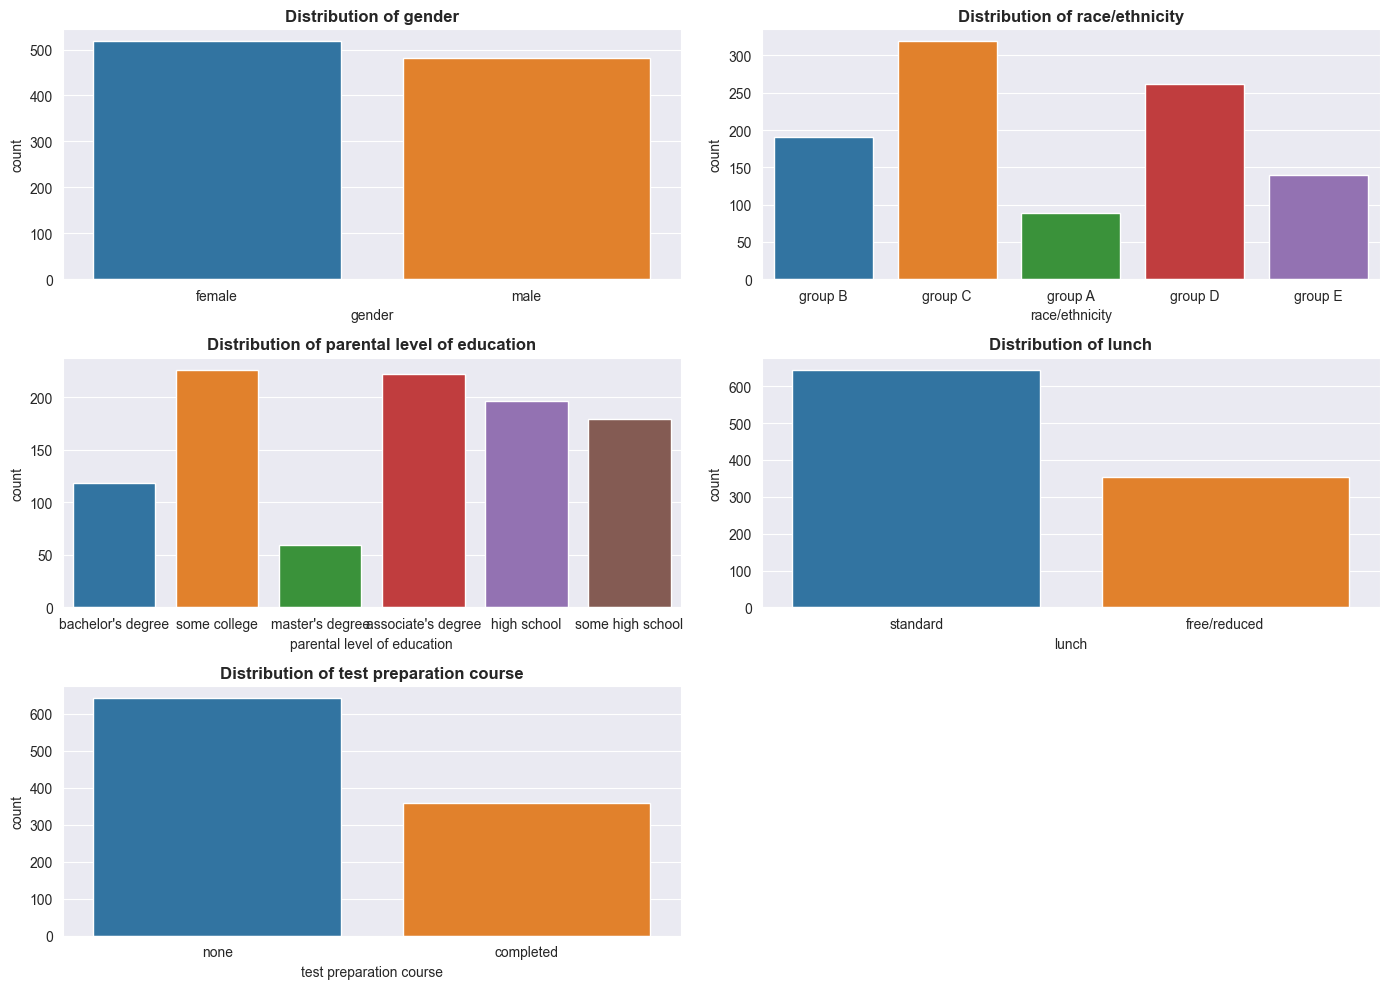

In [9]:
plt.figure(figsize=(14,10))
for index, c in enumerate(cat_data.columns):
    plt.subplot(3,2, index+1)
    sns.countplot(x=c, data=cat_data)
    plt.title(f"Distribution of {c}", fontweight='bold')
plt.tight_layout()

1. Most of the observation fall under 'group C' race/ethnicity. 
2. Most parent got 'some college' as level of education as well as 'associate's degree'.
3. 'Standard lunch' has highest frequency
4. Most of them has not taken any test preparation course.

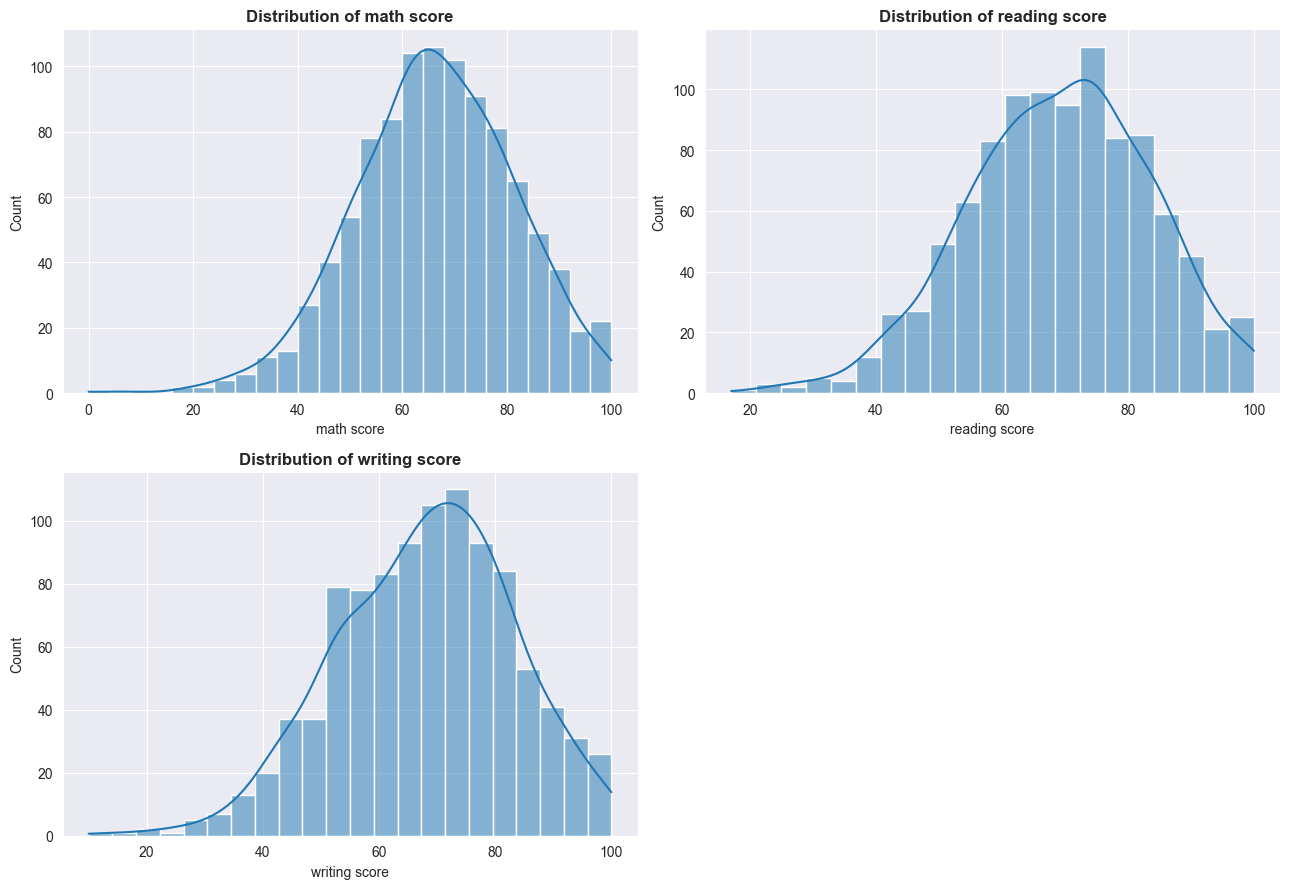

In [30]:
plt.figure(figsize=(13,9))
for index, c in enumerate(num_data.columns):
    plt.subplot(2,2, index+1)
    sns.histplot(x=c, data=num_data, kde=True)
    plt.title(f"Distribution of {c}", fontweight='bold')
plt.tight_layout()

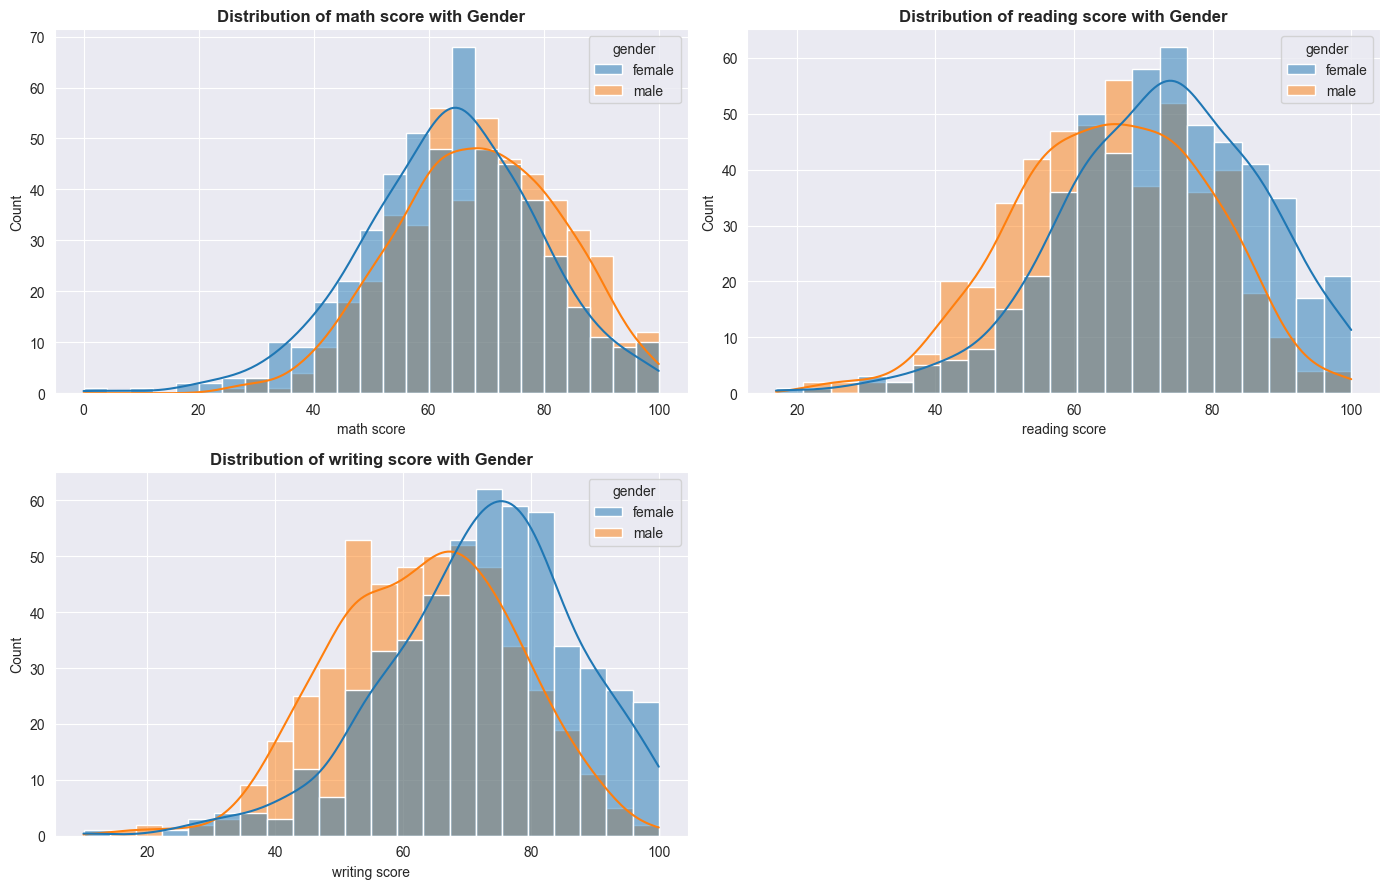

In [31]:
plt.figure(figsize=(14,9))
for index, c in enumerate(num_data.columns):
    plt.subplot(2,2, index+1)
    sns.histplot(x=c, data=std_data, hue='gender', kde=True)
    plt.title(f"Distribution of {c} with Gender", fontweight='bold')
plt.tight_layout()

1. Female have good reading and writing scores than male.
2. But, Male have higher math scores than female.

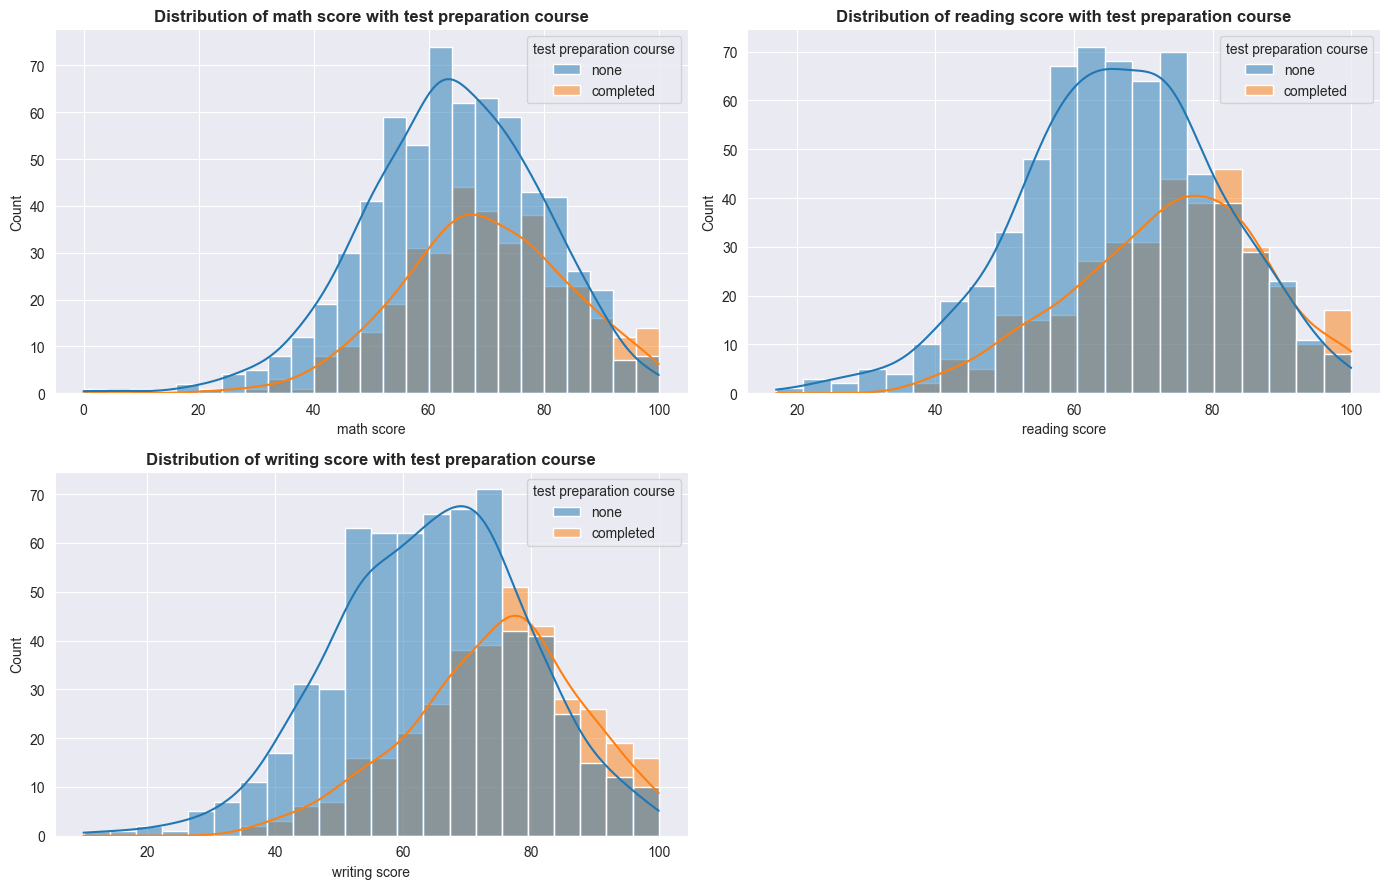

In [32]:
plt.figure(figsize=(14,9))
for index, c in enumerate(num_data.columns):
    plt.subplot(2,2, index+1)
    sns.histplot(x=c, data=std_data, hue='test preparation course', kde=True)
    plt.title(f"Distribution of {c} with test preparation course", fontweight='bold')
plt.tight_layout()

Taking test preparation course seem fruitful for students as they scored good marks.

In [22]:
std_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [16]:
# Calculate total score
std_data['total score'] = std_data['math score'] + std_data['reading score'] + std_data['writing score']

In [21]:
# Average score
std_data['average score'] = round(std_data['total score']/3,2)

<AxesSubplot: >

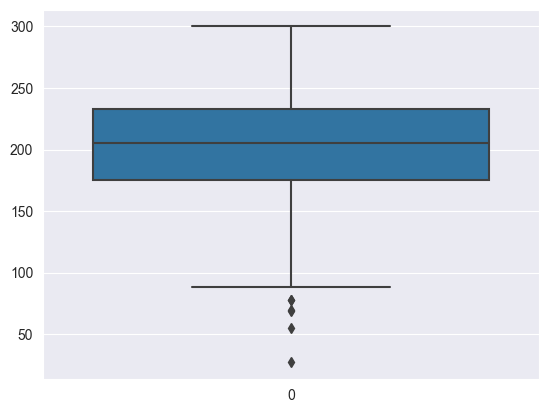

In [23]:
# Basic info
sns.boxplot(std_data['total score'])

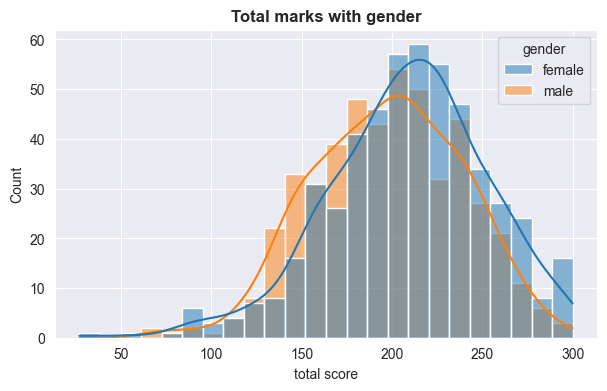

In [33]:
# Total marks
plt.figure(figsize=(7,4))
sns.histplot(x=std_data['total score'], hue=std_data['gender'], kde=True)
plt.title("Total marks with gender", fontweight='bold')
plt.show()

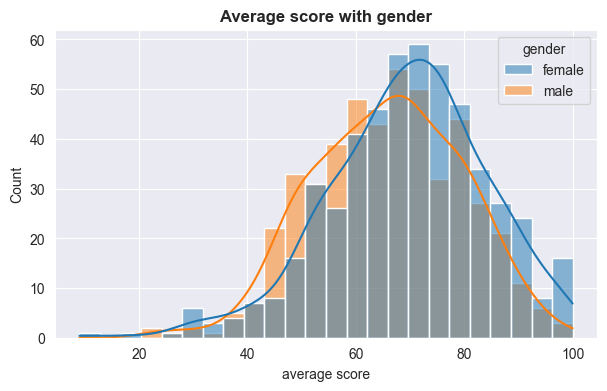

In [34]:
# Average score
plt.figure(figsize=(7,4))
sns.histplot(x=std_data['average score'], hue=std_data['gender'], kde=True)
plt.title("Average score with gender", fontweight='bold')
plt.show()

Observations:
1. Female have good reading and writing scores whereas male have good math score.
2. Students who have taken test preparation course are more likely to score good marks.
3. Female have good scores in overall than male.
    